In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-BRYN\SERVER1;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [4]:
cursor = conn.cursor()

In [5]:
query = 'SELECT * FROM Sales.TerritorySalesCON ORDER BY SalesYear, SalesQuarter, CountryRegionCode'

In [6]:
TerritoryPCON = pd.read_sql(query, conn)

C:\Users\new user\AppData\Local\Temp\ipykernel_7880\3857547915.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TerritoryPCON = pd.read_sql(query, conn)


In [7]:
print(TerritoryPCON.head(6))

  CountryRegionCode          Group  SalesYear  SalesQuarter         Sales  \
0                AU        Pacific       2011             2  2.096529e+05   
1                CA  North America       2011             2  2.308021e+06   
2                DE         Europe       2011             2  3.560442e+04   
3                FR         Europe       2011             2  4.017433e+04   
4                GB         Europe       2011             2  3.749843e+04   
5                US  North America       2011             2  5.016560e+06   

          Cost   GrossProfit  
0  124544.4014  8.510850e+04  
1  131828.8389  2.176192e+06  
2   21453.8022  1.415062e+04  
3   24052.1100  1.612222e+04  
4   22640.7222  1.485771e+04  
5  450709.9473  4.565850e+06  


SalesYear                  2011          2012          2013          2014
CountryRegionCode                                                        
AU                 2.055274e+05  1.992786e+05  8.365303e+06  1.034574e+07
CA                 9.444455e+06  4.244419e+07  4.872456e+07  2.923916e+07
DE                 3.276544e+04  5.080260e+04  1.367051e+07  1.163819e+07
FR                 2.832570e+04  1.010559e+07  2.485151e+07  1.472679e+07
GB                 4.824140e+04  8.761672e+06  2.152972e+07  1.917877e+07
US                 3.713779e+07  1.459910e+08  1.704721e+08  1.021912e+08


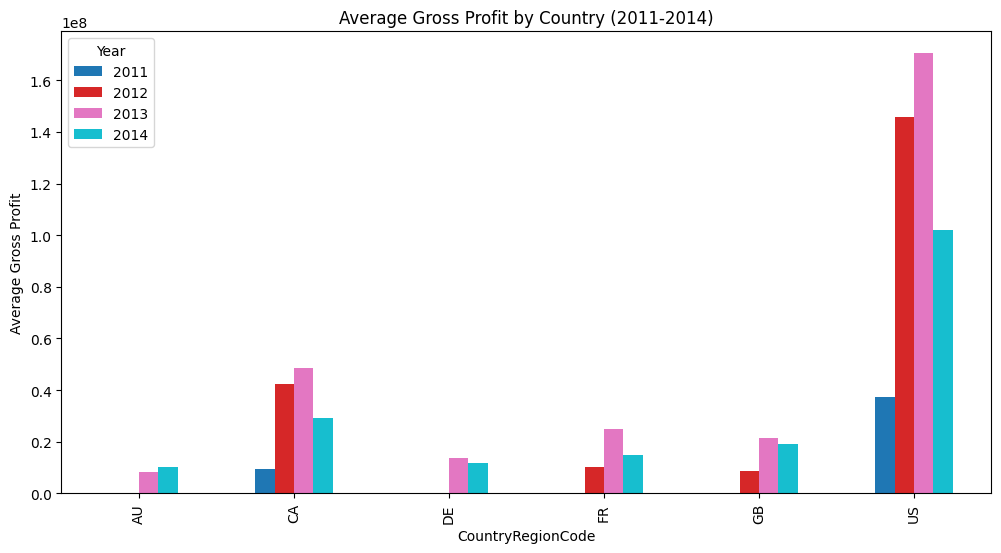

In [8]:

# Calculate the average GrossProfit for each CountryRegionCode per year
avg_profit_by_country = TerritoryPCON.groupby(['CountryRegionCode', 'SalesYear'])['GrossProfit'].mean()

# Reshape the data so each year is a column (for side-by-side bars)
avg_profit_by_country = avg_profit_by_country.unstack()

print(avg_profit_by_country)

# Plot the results
avg_profit_by_country.plot(kind='bar', figsize=(12, 6), colormap='tab10')

# Add labels and title
plt.xlabel('CountryRegionCode')
plt.ylabel('Average Gross Profit')
plt.title('Average Gross Profit by Country (2011-2014)')
plt.legend(title="Year")  # Add legend to distinguish years

# Show the plot
plt.show()